# Demo for how to calibrate PSF (and possibly other parameters) from line-profiles of fluorescence

In [3]:
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('../../sl2pm')

import track_vessel_A, track_vessel_B, track_vessel_C
from models import L_wall_plasma, L_plasma_no_glx, L_wall
import misc

## Protocol A (both plasma and wall fluorescence)

In [5]:
kymo_wall = np.load('wall.npy')
kymo_plasma = np.load('plasma.npy')

N_AVER, nx = kymo_wall.shape
x = np.arange(nx)

data_wall = np.mean(kymo_wall, axis=0)
data_plasma = np.mean(kymo_plasma, axis=0)

## Enter PMT parameters (known from the calibration)

In [6]:
ALPHA = 0.452
SIGMA = 6.0
GAIN = 3/ALPHA

## Make an initial parameter guess

In [7]:
p0_A = track_vessel_A.p0_ols(data_wall, data_plasma, ALPHA, sigma_blur=1.5)

Text(0, 0.5, 'Fluorescence (a.u.)')

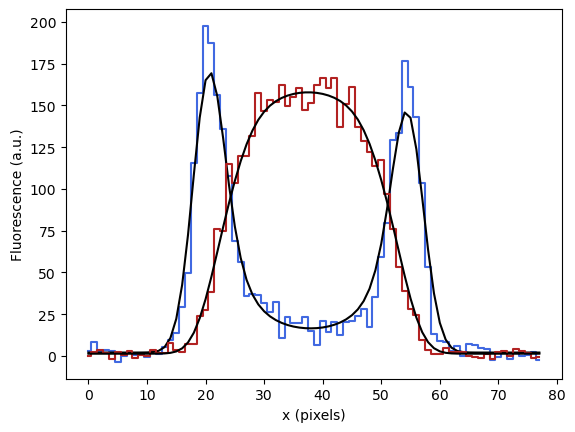

In [8]:
plt.step(x, data_wall, where='mid', c='royalblue')
plt.plot(x, L_wall_plasma(x, *p0_A)[0]*GAIN, c='k')

plt.step(x, data_plasma, where='mid', c='firebrick')
plt.plot(x, L_wall_plasma(x, *p0_A)[1]*GAIN, c='k')

plt.xlabel('x (pixels)')
plt.ylabel('Fluorescence (a.u.)')

## Fit

In [9]:
opt_res_A = track_vessel_A.mle_fit(data_wall, data_plasma, N_AVER, ALPHA, SIGMA, n_r=256, n_phi=256, p0='ols', sigma_blur=1, minimize_options=dict(gtol=1e-3))
opt_res_A

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 552.839919102935
        x: [ 3.751e+01  2.099e+00  8.536e+00  1.188e+01  1.778e+01
             6.531e+00 -8.464e-02  2.077e+02  2.841e+01 -6.948e-01
             3.378e-01  2.293e-01]
      nit: 27
      jac: [-1.526e-05  3.052e-05 -3.052e-05  3.052e-05  0.000e+00
             7.629e-06 -3.052e-05  0.000e+00  0.000e+00 -7.629e-06
             0.000e+00  0.000e+00]
 hess_inv: [[ 5.882e-04  7.567e-05 ... -8.421e-06 -1.558e-05]
            [ 7.567e-05  1.719e-03 ... -4.278e-04 -1.743e-04]
            ...
            [-8.421e-06 -4.278e-04 ...  2.768e-03  4.806e-05]
            [-1.558e-05 -1.743e-04 ...  4.806e-05  2.294e-03]]
     nfev: 442
     njev: 34

Text(0, 0.5, 'Photon count')

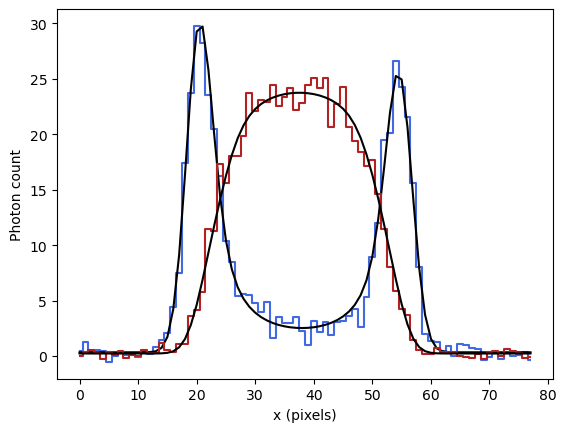

In [10]:
plt.step(x, data_wall/GAIN, where='mid', c='royalblue')
plt.plot(x, L_wall_plasma(x, *opt_res_A.x)[0], c='k')

plt.step(x, data_plasma/GAIN, where='mid', c='firebrick')
plt.plot(x, L_wall_plasma(x, *opt_res_A.x)[1], c='k')

plt.xlabel('x (pixels)')
plt.ylabel('Photon count')

In [11]:
misc.fitted_params(opt_res_A, ['xc', 's_xy', 'l', 'R_lum', 'R_wall', 's_gcx', 'a1', 'Iw', 'Ip', 'b_plasma', 'b_tissue_wall', 'b_tissue_plasma'])

{'xc': (37.514531752727734, 0.024252214512554084),
 's_xy': (2.0990066518259343, 0.04145620344418226),
 'l': (8.53637153229322, 1.1395471670290473),
 'R_lum': (11.878112301490791, 0.6727770726930106),
 'R_wall': (17.782735430574064, 0.06909500888656751),
 's_gcx': (6.530685391198167, 1.2457816241286603),
 'a1': (-0.08463891380639253, 0.009142759593842172),
 'Iw': (207.69940631993154, 12.945672916187533),
 'Ip': (28.414841994984187, 1.2787061545792435),
 'b_plasma': (-0.6948292092561138, 0.8261460954121371),
 'b_tissue_wall': (0.33780389267488725, 0.05260906613224806),
 'b_tissue_plasma': (0.2293079280929976, 0.047900577614110734)}

***

## Calibration: Protocol B (only plasma fluorescence)

In [12]:
kymo_plasma = np.load('plasma.npy')

N_AVER, nx = kymo_plasma.shape
x = np.arange(nx)

data_plasma = np.mean(kymo_plasma, axis=0)

## Enter PMT parameters (known from the calibration)

In [13]:
ALPHA = 0.452
SIGMA = 6.0
GAIN = 3/ALPHA

## Make an initial parameter guess

In [14]:
p0_B = track_vessel_B.p0_ols(data_plasma, ALPHA, sigma_blur=1.5)

Text(0, 0.5, 'Fluorescence (a.u.)')

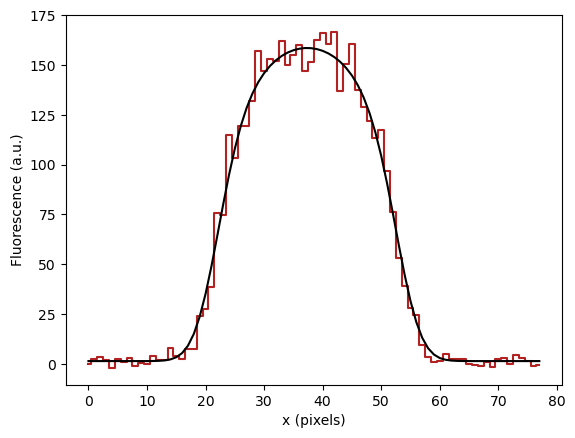

In [15]:
plt.step(x, data_plasma, where='mid', c='firebrick')
plt.plot(x, L_plasma_no_glx(x, *p0_B)*GAIN, c='k')

plt.xlabel('x (pixels)')
plt.ylabel('Fluorescence (a.u.)')

## Fit

In [16]:
opt_res_B = track_vessel_B.mle_fit(data_plasma, N_AVER, ALPHA, SIGMA, n_r=256, p0='ols', sigma_blur=1, minimize_options=dict(gtol=1e-4))
opt_res_B

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 242.47981782317507
        x: [ 3.736e+01  2.578e+00  2.172e+01  1.662e+01  4.507e+01
             2.245e-01]
      nit: 18
      jac: [-3.815e-06 -7.629e-06 -7.629e-06  8.583e-05  3.815e-06
             9.537e-06]
 hess_inv: [[ 3.149e-03 -3.454e-04 ...  1.535e-02  1.101e-05]
            [-3.454e-04  2.561e-02 ... -1.236e+00 -2.243e-03]
            ...
            [ 1.535e-02 -1.236e+00 ...  1.310e+02  6.706e-02]
            [ 1.101e-05 -2.243e-03 ...  6.706e-02  2.562e-03]]
     nfev: 203
     njev: 29

Text(0, 0.5, 'Photon count')

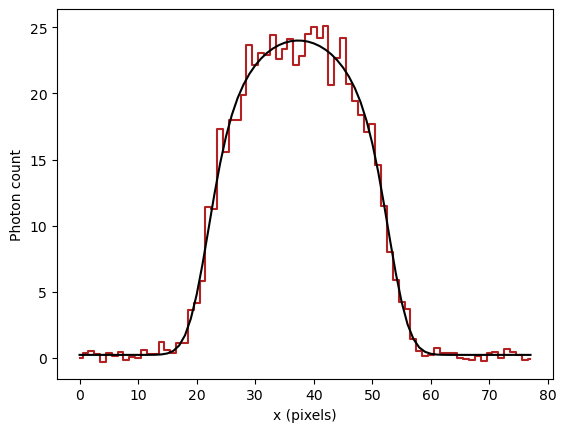

In [17]:
plt.step(x, data_plasma/GAIN, where='mid', c='firebrick')
plt.plot(x, L_plasma_no_glx(x, *opt_res_B.x), c='k')

plt.xlabel('x (pixels)')
plt.ylabel('Photon count')

In [18]:
misc.fitted_params(opt_res_B, ['xc', 's_xy', 'l', 'R_lum', 'I', 'b'])

{'xc': (37.35778293582464, 0.056117753543165456),
 's_xy': (2.578152222881865, 0.1600402166849724),
 'l': (21.723160968233984, 8.407311633132798),
 'R_lum': (16.621203815772994, 0.22196483774164275),
 'I': (45.070553674744964, 11.444713385088862),
 'b': (0.224455172089403, 0.05061362640358811)}

***

## Calibration: Protocol C (only wall fluorescence)

In [19]:
kymo_wall = np.load('wall.npy')

N_AVER, nx = kymo_wall.shape
x = np.arange(nx)

data_wall = np.mean(kymo_wall, axis=0)

## Enter PMT parameters (known from the calibration)

In [20]:
ALPHA = 0.452
SIGMA = 6.0
GAIN = 3/ALPHA

## Make an initial parameter guess

In [21]:
p0_C = track_vessel_C.p0_ols(data_wall, ALPHA, sigma_blur=1.5)

Text(0, 0.5, 'Fluorescence (a.u.)')

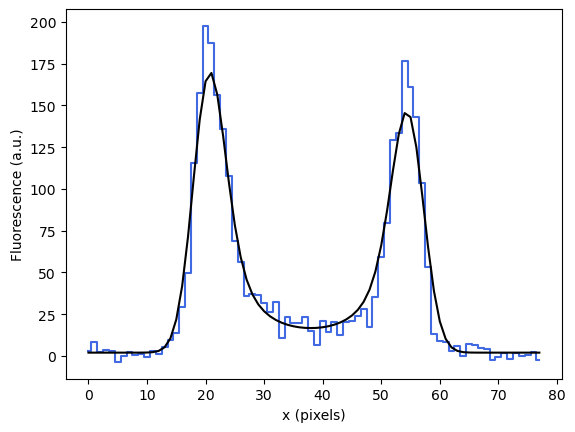

In [22]:
plt.step(x, data_wall, where='mid', c='royalblue')
plt.plot(x, L_wall(x, *p0_C)*GAIN, c='k')

plt.xlabel('x (pixels)')
plt.ylabel('Fluorescence (a.u.)')

## Fit

In [23]:
opt_res_C = track_vessel_C.mle_fit(data_wall, N_AVER, ALPHA, SIGMA, n_r=256, n_phi=256, p0='ols', sigma_blur=1, minimize_options=dict(gtol=1e-4))
opt_res_C

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 302.6080237945117
        x: [ 3.755e+01  2.109e+00  8.115e+00  1.776e+01 -8.535e-02
             2.029e+02 -3.864e-01  3.362e-01]
      nit: 18
      jac: [-1.144e-05 -3.815e-06 -3.815e-06  2.670e-05  4.959e-05
             3.815e-06 -3.815e-06  1.144e-05]
 hess_inv: [[ 7.385e-04  1.141e-04 ...  2.003e-03 -1.810e-05]
            [ 1.141e-04  1.754e-03 ...  2.096e-02 -4.736e-04]
            ...
            [ 2.003e-03  2.096e-02 ...  5.501e-01 -3.512e-03]
            [-1.810e-05 -4.736e-04 ... -3.512e-03  2.787e-03]]
     nfev: 243
     njev: 27

Text(0, 0.5, 'Photon count')

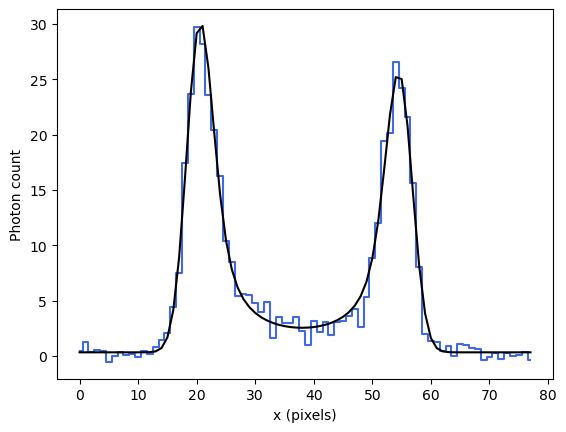

In [24]:
plt.step(x, data_wall/GAIN, where='mid', c='royalblue')
plt.plot(x, L_wall(x, *opt_res_C.x), c='k')

plt.xlabel('x (pixels)')
plt.ylabel('Photon count')

In [25]:
misc.fitted_params(opt_res_C, ['xc', 's_xy', 'l', 'R_wall', 'a1', 'I', 'b_plasma', 'b_tissue'])

{'xc': (37.55043689849665, 0.02717583560194581),
 's_xy': (2.108697567536135, 0.04188209962637976),
 'l': (8.114867534579611, 1.0178633929122083),
 'R_wall': (17.763960447753195, 0.06640088542590282),
 'a1': (-0.08534711705265528, 0.008984581570992455),
 'I': (202.925052065903, 11.400732319171102),
 'b_plasma': (-0.38640515875621945, 0.7416870083790497),
 'b_tissue': (0.33624663723451464, 0.05279394923253859)}